[*********************100%***********************]  1 of 1 completed


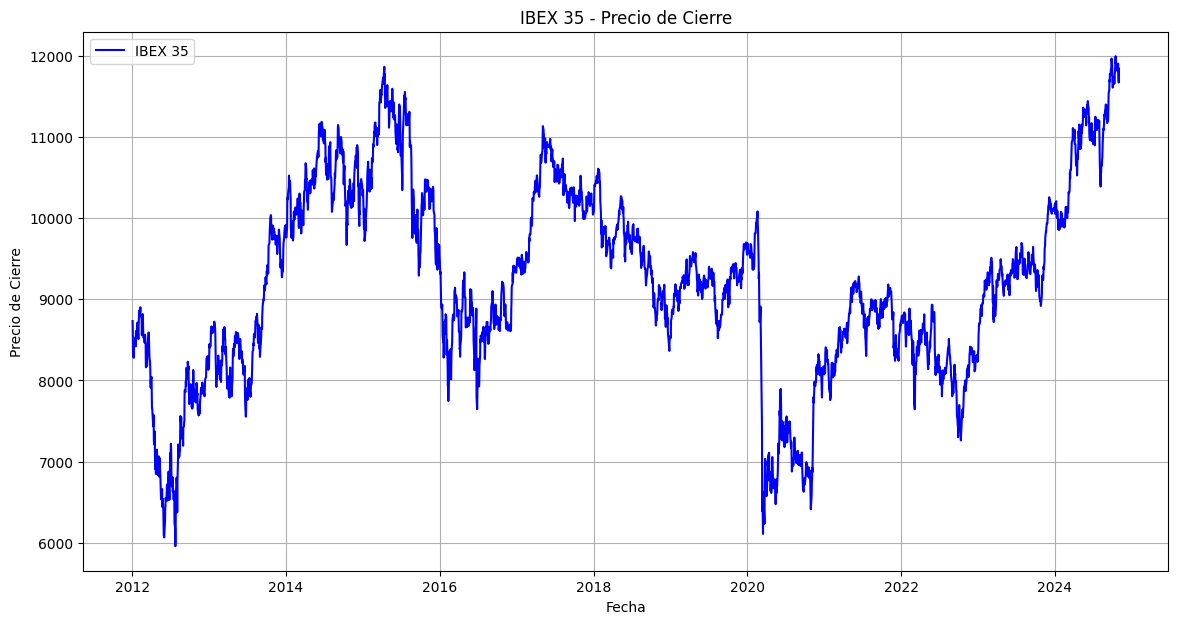

In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Define el símbolo del ticker y el periodo de tiempo
ticker = '^IBEX'
start_date = '2012-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

# Obtén los datos de las acciones
data = yf.download(ticker, start=start_date, end=end_date)

# Guardar en un archivo csv
#data.to_csv('ibex.csv')

# Visualización gráfica
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='IBEX 35', color='b')
plt.title('IBEX 35 - Precio de Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.show()



In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Limpiar datos: eliminar filas con valores nulos
data.dropna(inplace=True)

# Seleccionar solo la columna de cierre para este ejemplo
close_prices = data[['Close']]

# Escalar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Crear secuencias para la LSTM (por ejemplo, secuencias de 60 días)
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Redimensionar X para que sea compatible con LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X, y, batch_size=1, epochs=10)





Epoch 1/10

3223/3223 [==============================] - 136s 39ms/step - loss: 0.0018
Epoch 2/10
3223/3223 [==============================] - 125s 39ms/step - loss: 6.7789e-04
Epoch 3/10
3223/3223 [==============================] - 123s 38ms/step - loss: 6.1739e-04
Epoch 4/10
3223/3223 [==============================] - 120s 37ms/step - loss: 6.0476e-04
Epoch 5/10
3223/3223 [==============================] - 120s 37ms/step - loss: 5.4897e-04
Epoch 6/10
3223/3223 [==============================] - 118s 37ms/step - loss: 5.0618e-04
Epoch 7/10
3223/3223 [==============================] - 116s 36ms/step - loss: 5.3292e-04
Epoch 8/10
3223/3223 [==============================] - 97s 30ms/step - loss: 4.8939e-04
Epoch 9/10
3223/3223 [==============================] - 87s 27ms/step - loss: 4.8637e-04
Epoch 10/10
3223/3223 [==============================] - 78s 24ms/step - loss: 5.0404e-04


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Generar predicciones en los datos de entrenamiento
train_predictions = model.predict(X)

# Invertir la normalización para obtener los valores originales
train_predictions = scaler.inverse_transform(train_predictions)
y_actual = scaler.inverse_transform([y])

# Calcular las métricas de error
mse = mean_squared_error(y_actual[0], train_predictions[:, 0])
mae = mean_absolute_error(y_actual[0], train_predictions[:, 0])
rmse = math.sqrt(mse)

print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}")


101/101 [==============================] - 3s 16ms/step
MSE: 12438.958579620588, MAE: 81.16791421036302, RMSE: 111.53007925945623


In [6]:
import streamlit as st

st.title("Predicción del IBEX 35 con LSTM")
st.write("Este modelo predice el índice IBEX 35 utilizando redes neuronales LSTM.")

# Ingresar parámetros (por ejemplo, número de días de predicción)
days_to_predict = st.slider("Días a predecir", min_value=1, max_value=30, value=7)

# Mostrar predicciones
st.write("Predicciones futuras del IBEX 35:")
# Aquí deberías realizar la predicción con el modelo
# Ejemplo (dummys):
future_predictions = [8000, 8050, 8100, 8150]  # Esto debe reemplazarse con predicciones reales
st.line_chart(future_predictions)


2024-11-04 15:32:50.179 
  command:

    streamlit run C:\Users\usuario\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()